

# Project: Investigate a Dataset (No Show Appoitments From Kaggle ) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ANN">Deep Learning model</a></li>
</ul>

<a id='intro'></a>
## Introduction


The dataset which I have selected for analysis is called a medical appointment No show dataset which shows if patient did not show up for his or her scheduled appointment . 

# Independent Variables 
The dataset has some other features like 
PatientID<br>
Appointment ID <br>
Gender <br>
ScheduledDay ( shows date and time of appointment schedule) <br>
ApointmentDay ( shows date and time of appontment) <br>
Age <br>
Neighbourhood <br> 
Scholarship ( indicates if the patient is had government medical assistance)<br>
Hipertension,
Diabetes, Alcoholism , Handcap, SMS_received <br>

No-show ( The variable we are trying to predict or see if other independent variables above show a relation to this variable) .

# Question to explore 
Does scholarship affect no-show <br>
Doe Gender affect no-show <br>
Do Alcoholism affect no-show <br>
Which Neighbourhood has highest no show <br>
Which diease affect no show the most <br>

# Application 

 It would be very good to know if there is a relation between No-show ( dependent variable ) and other variables provided to identify patients which are more likely to be no-show . This might help us to better identify individuals for follow up so that  we can follow up with such individuals close to their appointment , invovle their family members to make sure they  don't miss the appointment ,   schedule stand by at their places  or help better arriange doctors schedule 
 

In [1]:
# importing the required packages 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling



In [2]:
#Reading the csv file 

No_show =pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
#To see the header of the data set to see what variables are present in it 

No_show.head(30)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#Cecking for duplicates 
No_show.duplicated().sum()

0

In [5]:
#Dropping patientId and AppointmentID columns as they are human assigned and  wont have an effect on prediction of No shows 

No_show.drop(['PatientId','AppointmentID'] ,axis=1,inplace = True )

In [6]:

#Seeing the new modified dataframe . We see that the above columns have been dropped 

No_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Checking the data types for various columns 

No_show.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [8]:
#Converting Schedule Day and AppointmentDay to Data time 
# Also removing the time stamp from data as appointment day does not give a specific time of appointment .

No_show['ScheduledDay'] = pd.to_datetime(No_show['ScheduledDay']).dt.date.astype('datetime64[ns]')
No_show['AppointmentDay'] = pd.to_datetime(No_show['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
##Now we can see that Schedule Day and appointment day is converted to datetime 
No_show.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [10]:
No_show.sample(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
104697,F,2016-06-01,2016-06-03,29,GRANDE VITÓRIA,0,0,0,0,0,0,No
2014,M,2016-04-19,2016-04-29,9,SANTOS REIS,1,0,0,0,0,1,Yes
77047,M,2016-05-13,2016-05-13,40,BELA VISTA,0,0,0,0,0,0,No
6284,F,2016-05-16,2016-05-18,45,RESISTÊNCIA,0,0,0,0,0,0,No
69777,F,2016-05-31,2016-05-31,16,PRAIA DO CANTO,0,0,0,0,0,0,No


In [11]:
#To Check if there AppointmentDay is before ScheduledDay 
No_show[(No_show['AppointmentDay']<No_show['ScheduledDay'])==True]


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [12]:
#Dropping this rows as it is not possible 

No_show.drop(index=[27033,55226,64175,71533,72362],inplace=True)

In [13]:
#Recheck 
No_show[(No_show['AppointmentDay']<No_show['ScheduledDay'])==True]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [14]:
No_show.describe()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040
std,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
# We See that the min age is -1 we need to corrrect that entry 
#Removing the ages below 0  

No_show=No_show[(No_show['Age']>=0)]


In [16]:
No_show.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
#Now we see that the min value of age is zero which actually does not makes sense using value counts method I see that there 
# 3539 values of age =0 . Let drop those values from the data set .I assume they could be of babies who are less than a year old 
(No_show['Age'].value_counts())

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1628
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1544
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      433
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [18]:
#Checking if all Categorical variable columns have no entry apart from 0 and 1 
No_show['Scholarship'].unique()

array([0, 1])

In [19]:
No_show['Hipertension'].unique()

array([1, 0])

In [20]:
No_show['Diabetes'].unique()

array([0, 1])

In [21]:
No_show['Alcoholism'].unique()

array([0, 1])

In [22]:
No_show['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [23]:
#As Handcap defination on Kaggle was given to be true or false . I was expecting it to be 0 or 1 but it shows it has values 0 to 4
##For this data analyis i am going to convert number 2,3,4 to 1 . They might indicate seriousness of  handicap but I am planing 
##to analyse this data from boolean point of view 

No_show['Handcap'].value_counts()

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [24]:
No_show['handcap_modified']= No_show['Handcap'].replace({2:1,3:1,4:1})

In [25]:
No_show['handcap_modified'].value_counts()

## We see that the total of the non zero values add up 2241 

0    108282
1      2239
Name: handcap_modified, dtype: int64

In [26]:
##We can drop the original Handcap column now 

No_show.drop(columns='Handcap', axis=1,inplace=True)

In [27]:
##Checking to see the effect 
No_show.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received',
       'No-show', 'handcap_modified'],
      dtype='object')

In [28]:
No_show['SMS_received'].unique()

array([0, 1])

In [29]:
No_show['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
# We see that there are no null values in any of the columns 
No_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
Gender              110521 non-null object
ScheduledDay        110521 non-null datetime64[ns]
AppointmentDay      110521 non-null datetime64[ns]
Age                 110521 non-null int64
Neighbourhood       110521 non-null object
Scholarship         110521 non-null int64
Hipertension        110521 non-null int64
Diabetes            110521 non-null int64
Alcoholism          110521 non-null int64
SMS_received        110521 non-null int64
No-show             110521 non-null object
handcap_modified    110521 non-null int64
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [31]:
##Changing yes and no object to int for ease in fitting a Deep learning model later
No_show['No-show_catergorical']= No_show['No-show'].replace({'Yes':1,'No':0})

In [32]:
No_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,handcap_modified,No-show_catergorical
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0


In [33]:
#Checking of the value count of yes/no and 1/0 (created ) are the same 
No_show['No-show'].value_counts()

No     88207
Yes    22314
Name: No-show, dtype: int64

In [34]:
No_show['No-show_catergorical'].value_counts()

0    88207
1    22314
Name: No-show_catergorical, dtype: int64

In [35]:
No_show.dtypes

Gender                          object
ScheduledDay            datetime64[ns]
AppointmentDay          datetime64[ns]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
SMS_received                     int64
No-show                         object
handcap_modified                 int64
No-show_catergorical             int64
dtype: object

In [36]:
No_show.dtypes

Gender                          object
ScheduledDay            datetime64[ns]
AppointmentDay          datetime64[ns]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
SMS_received                     int64
No-show                         object
handcap_modified                 int64
No-show_catergorical             int64
dtype: object

In [37]:
#Renaming columns to correct spelling errors 

No_show.rename(columns={'Hipertension':'hypertension', 'handcap_modified':'handicap_modified'},inplace=True)

In [38]:
#Let replace the header to make it consitent like all small and no spaces 
col_names=[]
for header in No_show.columns:
    col_names.append(header.lower().strip().replace("-","_"))

In [39]:
No_show.columns=col_names

In [40]:
No_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0


#  Now our data looks good to do some exploratory data analysis 

In [41]:
#Plotting all independent variables 

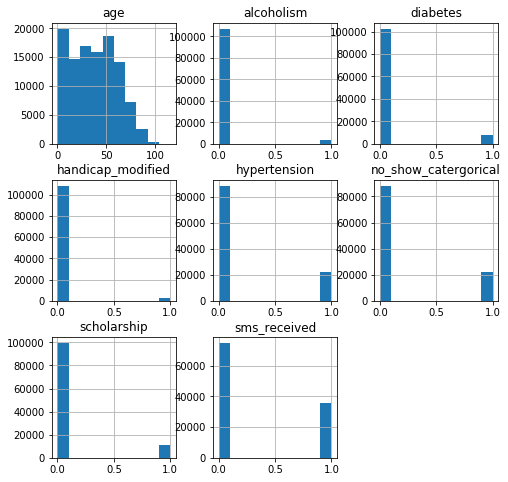

In [42]:
No_show.hist(figsize=(8,8));

# This the distribution of all varibles in the data set 

We see that age is distributed more towards younger side (<50) Hence planing to drop people below age of 75 so as to focus on the area where we have larger data samples<br> 

 Very few people suffer from alchololism , diabetes or are handicap <br>
Most people do not miss appointment <br>More than 1/4 th people receive SMS <br>
Most people do not have scholarship <br>

In [43]:
No_show=No_show[(No_show['age']<=75)]

In [44]:
No_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0


In [45]:
sns.set_style('whitegrid')

In [46]:
def countplot(datacol):
    sns.countplot(x=datacol,data=No_show,hue='no_show').set_title('No Shows by '+datacol,fontsize=20)

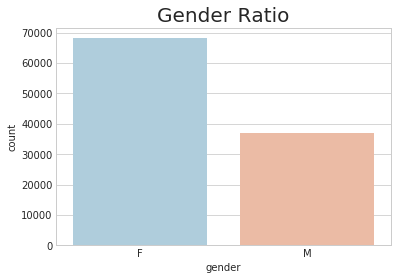

In [129]:
sns.countplot(x='gender',data=No_show,palette="RdBu_r").set_title('Gender Ratio',fontsize=20);

# We see that we have more female vs male in the dataset. So direct comparison between gender is not possible  

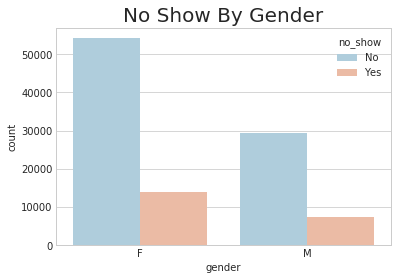

In [130]:
sns.countplot(x='gender',data=No_show,hue='no_show',palette="RdBu_r").set_title('No Show By Gender',fontsize=20);

# As expected since we have more women in dataset we represent them more in no show but from the graph we see that ration of female no show and male no shows is roughly similar so gender is not a sharp demarking feature to identify no shows 


In [49]:
(No_show.query('gender == "M"')['no_show_catergorical'] == 1).mean()

0.20141333188931607

In [50]:
(No_show.query('gender == "F"')['no_show_catergorical'] == 1).mean()

0.20537861458150039


### To Check proportion of show vs no shows 


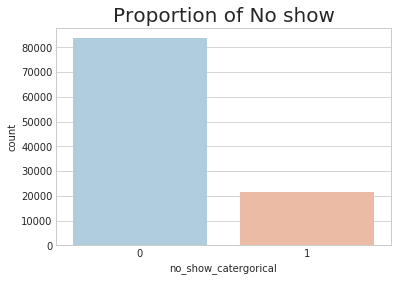

In [132]:

sns.countplot(x='no_show_catergorical',data=No_show,palette="RdBu_r").set_title('Proportion of No show',fontsize=20);

# Thus we see that we have roughly 1/4 no shows in out data set 



##  Q1 lets check if having a handicap results in more no shows ?

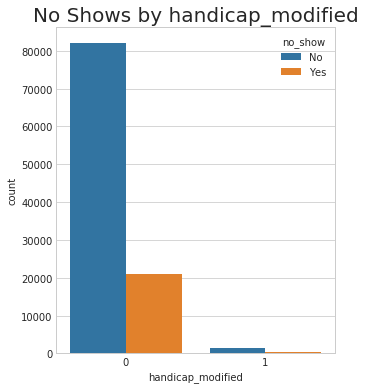

In [52]:
plt.figure(figsize=(5,6))

countplot('handicap_modified')


In [53]:
(No_show.query('handicap_modified == 1')['no_show_catergorical'] == 0).mean()

0.82048574445617739

In [54]:
(No_show.query('handicap_modified == 0')['no_show_catergorical'] == 0).mean()

0.79556550040683482

 
Thus we see from the graph as well as the numbers people with no handicap have a less chance of showing up than people with handicap for their appointment 

 ### Q2 Do SMS help in reducing no show . 

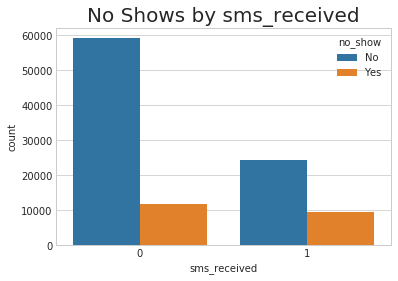

In [55]:


countplot('sms_received')

In [56]:
(No_show.query('sms_received == 0')['no_show_catergorical'] == 1).mean()

0.16822259089503136

In [57]:
(No_show.query('sms_received == 1')['no_show_catergorical'] == 1).mean()

0.27879073050229386


From graph we can see that number number of people who are no show is higher among people who receive a SMS which looks a bit different than what one would assume 

# Q3 Do people with scholarship has a less chance of missing their appointment

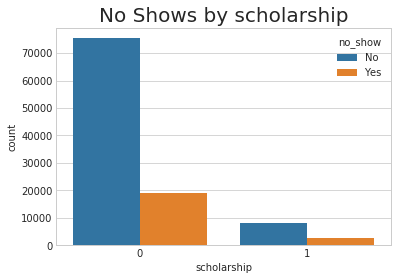

In [58]:

countplot('scholarship')

In [59]:

(No_show.query('scholarship == 0')['no_show_catergorical'] == 1).mean()

0.2001060557853431

In [60]:
(No_show.query('scholarship == 1')['no_show_catergorical'] == 1).mean()

0.23773062730627306


We see that people having scholarship are more likely to be no show 

## Q4 Check which of the health issues have most significant impact on no-shows 

# To see the effect of hypertension on no show 

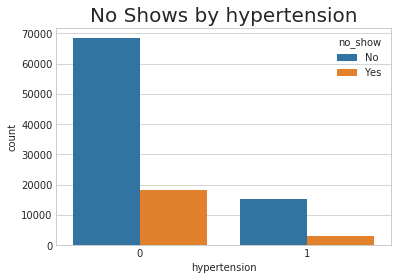

In [61]:

countplot('hypertension')

In [62]:
(No_show.query('hypertension == 0')['no_show_catergorical'] == 1).mean()

0.2105621451977662

In [63]:
(No_show.query('hypertension== 1')['no_show_catergorical'] == 1).mean()

0.17311233885819521

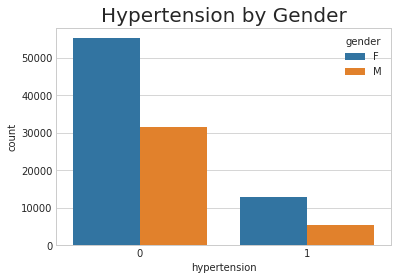

In [155]:
#To check the ratio of hypertension suffered by gender 
sns.countplot(x='hypertension',data=No_show,hue='gender').set_title('Hypertension by Gender',fontsize=20);

In [65]:
(No_show.query('hypertension== 0')['gender'] == 'M').mean()

0.36315595144690083

In [66]:
(No_show.query('hypertension== 1')['gender'] == 'M').mean()

0.29574260643483913

# To see the effect of diabetes on no show 

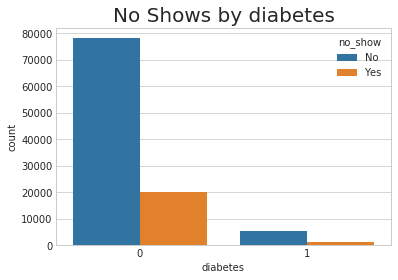

In [67]:
countplot('diabetes')

In [68]:
(No_show.query('diabetes == 0')['no_show_catergorical'] == 1).mean()

0.20549393572786515

In [69]:
(No_show.query('diabetes == 1')['no_show_catergorical'] == 1).mean()


0.18205999704448056

# To see the effect of alcohlism on no show 

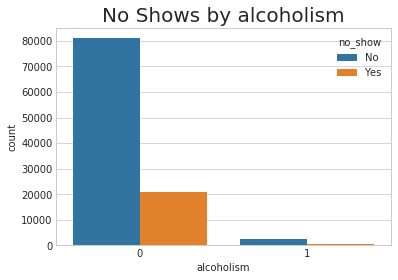

In [70]:
countplot('alcoholism')

In [71]:
(No_show.query('alcoholism ==0')['no_show_catergorical'] == 1).mean()

0.2039794154619736

In [72]:
(No_show.query('alcoholism == 1')['no_show_catergorical'] == 1).mean()

0.20417422867513613

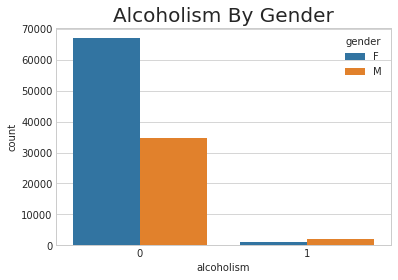

In [73]:
sns.countplot(x='alcoholism',data=No_show,hue='gender').set_title('Alcoholism By Gender',fontsize=20);

 

 We see that people who do not have hypertension have the higest ration of no show followed by people who do not have diabetes. 
 
 Alcoholism show very little difference between show and no show 
 
 We Also see that more men suffer from Alcoholism as compared to Women .

# Q5  Which neighbourhood has more no show 

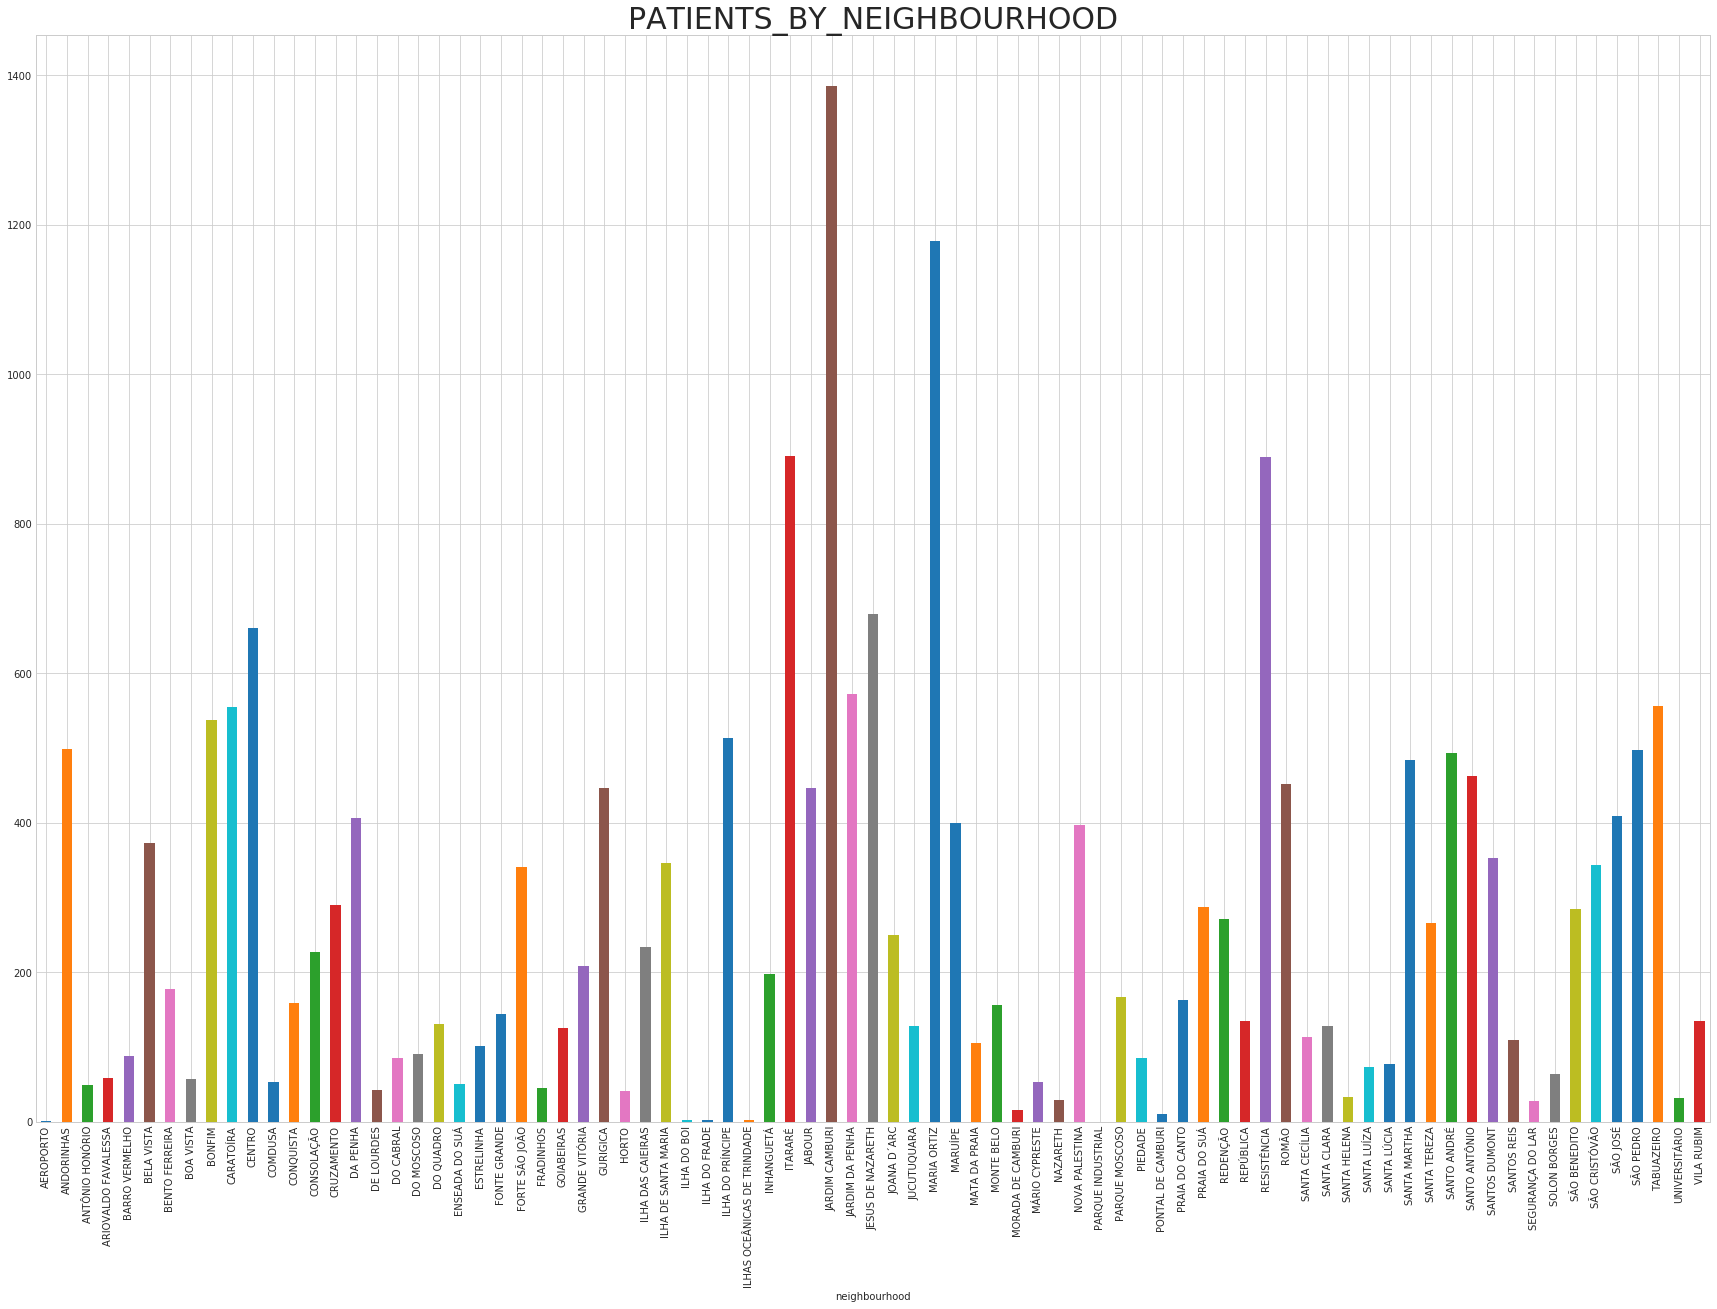

In [74]:
No_show.groupby('neighbourhood').sum()['no_show_catergorical'].plot(kind='bar',x='no_show_catergorical',figsize=(30,20)).set_title('PATIENTS_BY_NEIGHBOURHOOD',fontsize=30);


In [75]:
No_show.groupby('neighbourhood').sum()['no_show_catergorical']

neighbourhood
AEROPORTO                1
ANDORINHAS             499
ANTÔNIO HONÓRIO         49
ARIOVALDO FAVALESSA     59
BARRO VERMELHO          88
BELA VISTA             373
BENTO FERREIRA         178
BOA VISTA               57
BONFIM                 537
CARATOÍRA              555
CENTRO                 661
COMDUSA                 54
CONQUISTA              159
CONSOLAÇÃO             227
CRUZAMENTO             290
DA PENHA               406
DE LOURDES              43
DO CABRAL               86
DO MOSCOSO              91
DO QUADRO              131
ENSEADA DO SUÁ          51
ESTRELINHA             102
FONTE GRANDE           145
FORTE SÃO JOÃO         341
FRADINHOS               46
GOIABEIRAS             126
GRANDE VITÓRIA         209
GURIGICA               447
HORTO                   42
ILHA DAS CAIEIRAS      234
                      ... 
PARQUE INDUSTRIAL        0
PARQUE MOSCOSO         167
PIEDADE                 85
PONTAL DE CAMBURI       11
PRAIA DO CANTO         163
PRAIA DO SUÁ  

 

 # We see from the above graph that most no show occur at JARDIM CAMBURI and  minimum show accour at AEROPORTO

# Q6 Let see the age of people who are no shows

In [76]:
#Only displayed to take the 5 point summary for making bin_edges
No_show.describe()

,age,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap_modified,no_show_catergorical
count,105130.000000,105130.000000,105130.000000,105130.000000,105130.000000,105130.000000,105130.000000,105130.000000
mean,34.793874,0.103110,0.175611,0.064368,0.031447,0.323447,0.018016,0.203986
std,21.265765,0.304105,0.380491,0.245408,0.174523,0.467794,0.133009,0.402960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.0,17.0,35.0,53.0,75.0] 

In [78]:
# Labels for the four age groups
bin_names = ['Children','Youth' ,'Adults','Senior']

In [79]:
# Creates age-group column
No_show['age-groups'] = pd.cut(No_show['age'], bin_edges, labels=bin_names)
No_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0,Senior
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0,Senior
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0,Senior
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0,Children
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0,Senior


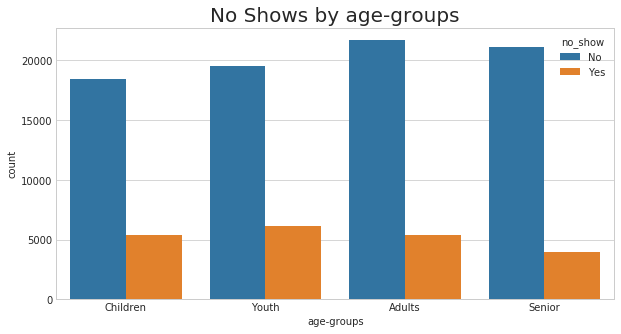

In [80]:
plt.figure(figsize=(10,5))
countplot('age-groups')

# Thus we can see from above graph that youths have the most high chance of being a now show 

In [81]:
No_show['appointment_week_day'] = No_show['appointmentday'].map(lambda day: day.day_name())

# Q7 Which day has most no shows 

In [82]:


No_show.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0,Senior,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0,Senior,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0,Senior,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0,Children,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0,Senior,Friday


In [83]:
No_show.dtypes

gender                          object
scheduledday            datetime64[ns]
appointmentday          datetime64[ns]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
sms_received                     int64
no_show                         object
handicap_modified                int64
no_show_catergorical             int64
age-groups                    category
appointment_week_day            object
dtype: object

In [84]:

No_show.sample(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day
4133,F,2016-05-05,2016-05-05,67,MARIA ORTIZ,0,0,0,0,0,No,0,0,Senior,Thursday
62543,F,2016-05-10,2016-05-24,11,SÃO CRISTÓVÃO,0,0,0,0,1,Yes,0,1,Children,Tuesday
94577,M,2016-05-16,2016-06-02,6,SANTO ANDRÉ,0,0,0,0,1,No,0,0,Children,Thursday
47384,F,2016-04-26,2016-05-10,66,SANTOS DUMONT,0,1,0,0,1,Yes,0,1,Senior,Tuesday
54472,F,2016-05-10,2016-05-10,23,SÃO BENEDITO,1,0,0,0,0,No,0,0,Youth,Tuesday


In [85]:

#Checking for days where schedule day is before appointmentday We had taken care about this above 
No_show[(No_show['scheduledday']>No_show['appointmentday'])]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day


In [86]:
(No_show['appointment_week_day'].value_counts())

Wednesday    24638
Tuesday      24327
Monday       21672
Friday       18067
Thursday     16390
Saturday        36
Name: appointment_week_day, dtype: int64

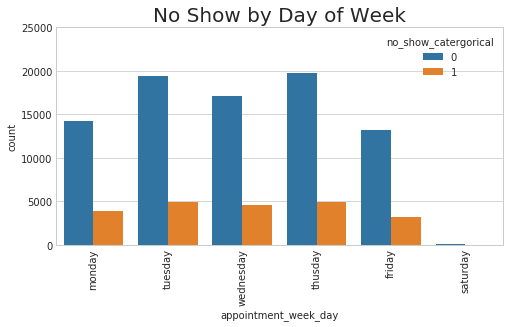

In [139]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='appointment_week_day',data=No_show,hue='no_show_catergorical')
labels=['monday','tuesday','wednesday','thusday','friday','saturday']
ax.set_xticklabels(labels, rotation='vertical', fontsize=10);
ax.set_title('No Show by Day of Week',fontsize=20);
plt.ylim(0,25000,100);

# We see that appointments on weekend are neglibile 
# Most no shows happens on Wednesday and the Monday 


In [88]:
#Difference in days between schedule day and appointment day
No_show['difference']=(No_show['appointmentday']-No_show['scheduledday'])



In [89]:
No_show.sample(10)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day,difference
39012,F,2016-05-05,2016-05-10,12,REDENÇÃO,0,0,0,0,0,No,0,0,Children,Tuesday,5 days
107367,M,2016-06-03,2016-06-03,53,SANTA CECÍLIA,0,1,1,0,0,No,0,0,Adults,Friday,0 days
87758,F,2016-05-16,2016-06-06,23,GRANDE VITÓRIA,1,0,0,0,1,No,0,0,Youth,Monday,21 days
18434,M,2016-05-09,2016-05-09,46,MARIA ORTIZ,0,0,0,0,0,No,0,0,Adults,Monday,0 days
102265,F,2016-05-30,2016-06-01,42,CRUZAMENTO,0,1,0,0,0,Yes,0,1,Adults,Wednesday,2 days
71588,F,2016-04-26,2016-05-03,60,BARRO VERMELHO,0,0,0,0,1,No,0,0,Senior,Tuesday,7 days
7239,M,2016-03-10,2016-05-09,31,SÃO JOSÉ,0,0,0,0,0,No,0,0,Youth,Monday,60 days
77130,M,2016-05-05,2016-05-13,34,BELA VISTA,0,0,0,0,0,No,0,0,Youth,Friday,8 days
6319,F,2016-05-02,2016-05-05,52,DA PENHA,0,1,1,0,0,No,0,0,Adults,Thursday,3 days
83742,F,2016-04-25,2016-05-13,44,JARDIM CAMBURI,0,0,0,0,0,Yes,0,1,Adults,Friday,18 days


In [90]:
No_show.dtypes

gender                           object
scheduledday             datetime64[ns]
appointmentday           datetime64[ns]
age                               int64
neighbourhood                    object
scholarship                       int64
hypertension                      int64
diabetes                          int64
alcoholism                        int64
sms_received                      int64
no_show                          object
handicap_modified                 int64
no_show_catergorical              int64
age-groups                     category
appointment_week_day             object
difference              timedelta64[ns]
dtype: object

In [91]:
No_show['difference']=(No_show['appointmentday']-No_show['scheduledday']).dt.days.astype(int)

In [92]:
No_show.sample(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day,difference
60976,F,2016-05-13,2016-05-19,61,FRADINHOS,0,1,0,0,0,No,0,0,Senior,Thursday,6
94624,M,2016-05-10,2016-06-02,52,SÃO JOSÉ,0,0,0,1,1,Yes,0,1,Adults,Thursday,23
10350,M,2016-05-13,2016-05-17,14,RESISTÊNCIA,0,0,0,0,0,No,0,0,Children,Tuesday,4
40849,M,2016-04-12,2016-05-16,62,MARIA ORTIZ,0,0,0,0,0,No,0,0,Senior,Monday,34
7839,F,2016-05-19,2016-05-20,64,INHANGUETÁ,0,0,0,0,0,No,0,0,Senior,Friday,1


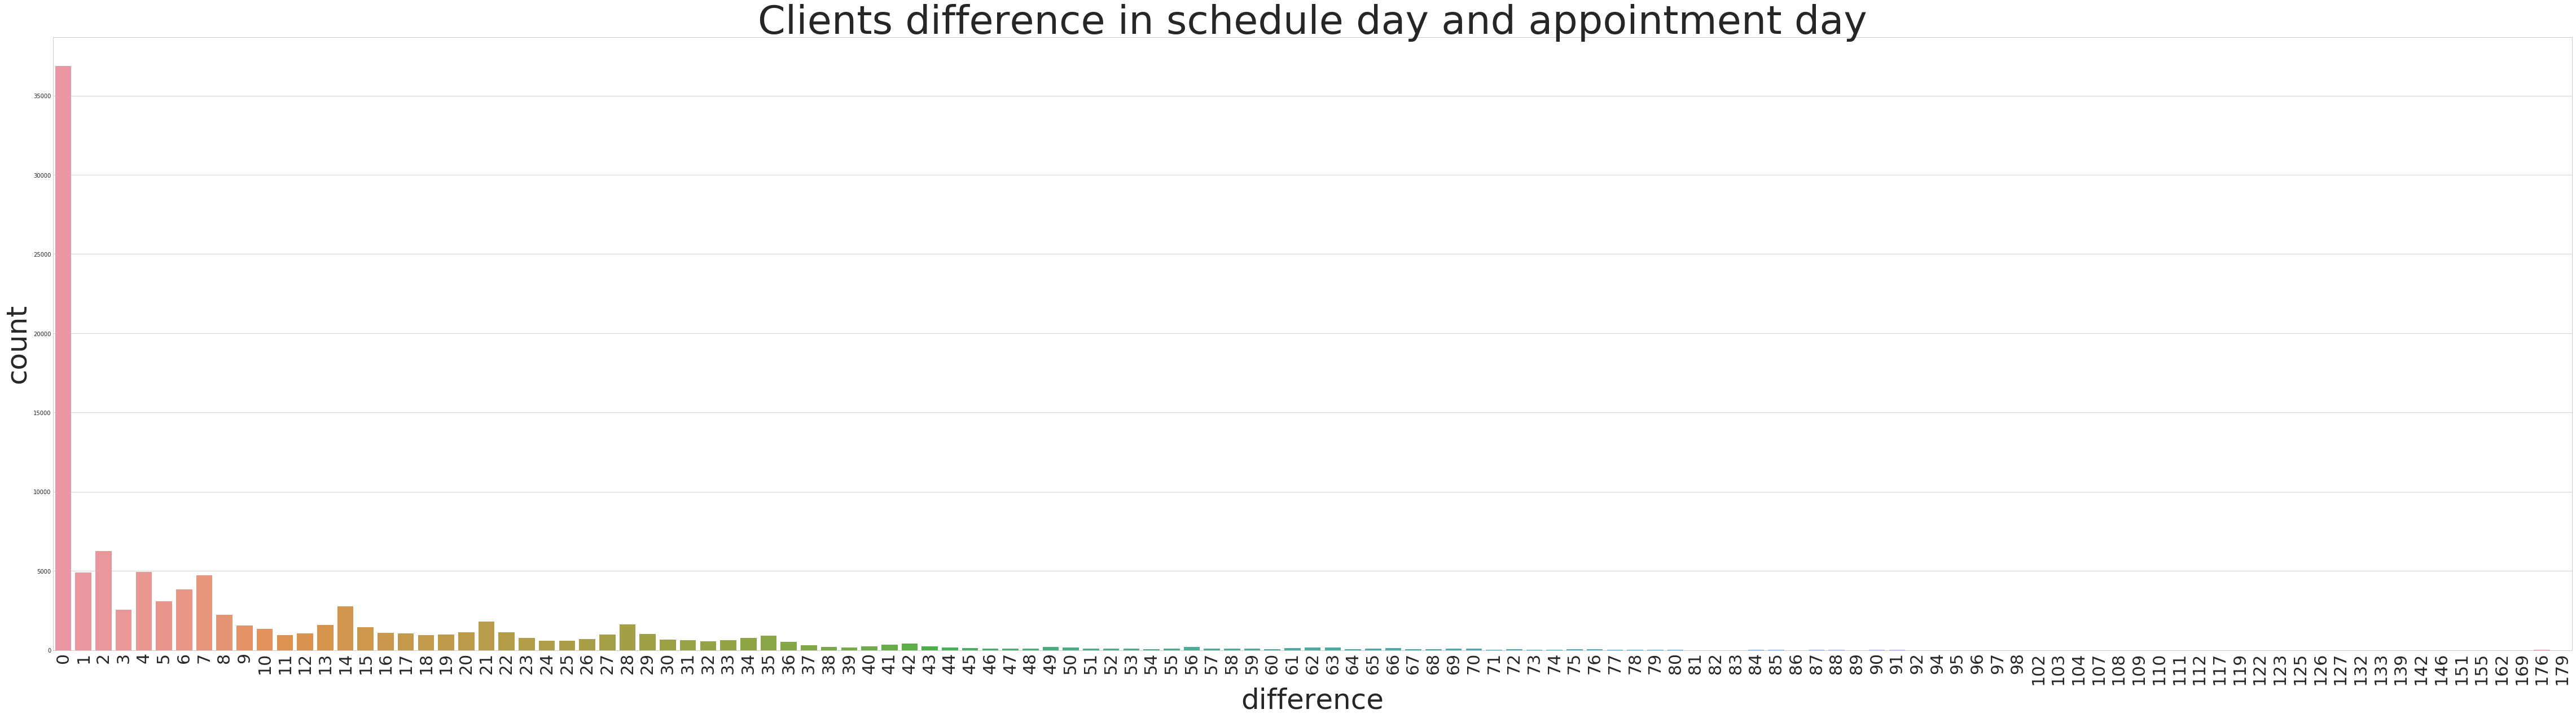

In [151]:
plt.figure(figsize=(80,20))
sns.countplot(x='difference',data=No_show).set_title('Clients difference in schedule day and appointment day',fontsize=70);
plt.xlabel('difference', fontsize=50)
plt.ylabel('count', fontsize=50)
plt.xticks(fontsize=30, rotation=90);
#plt.legend(loc=1, fontsize = 'x-large')

In [94]:
# We see that no most appointments have been schedules befor 40 days of appointment day and majority are at the same day 
#Plotting data which is less than 40 days 
No_show_diff=No_show[(No_show['difference']<=40)]

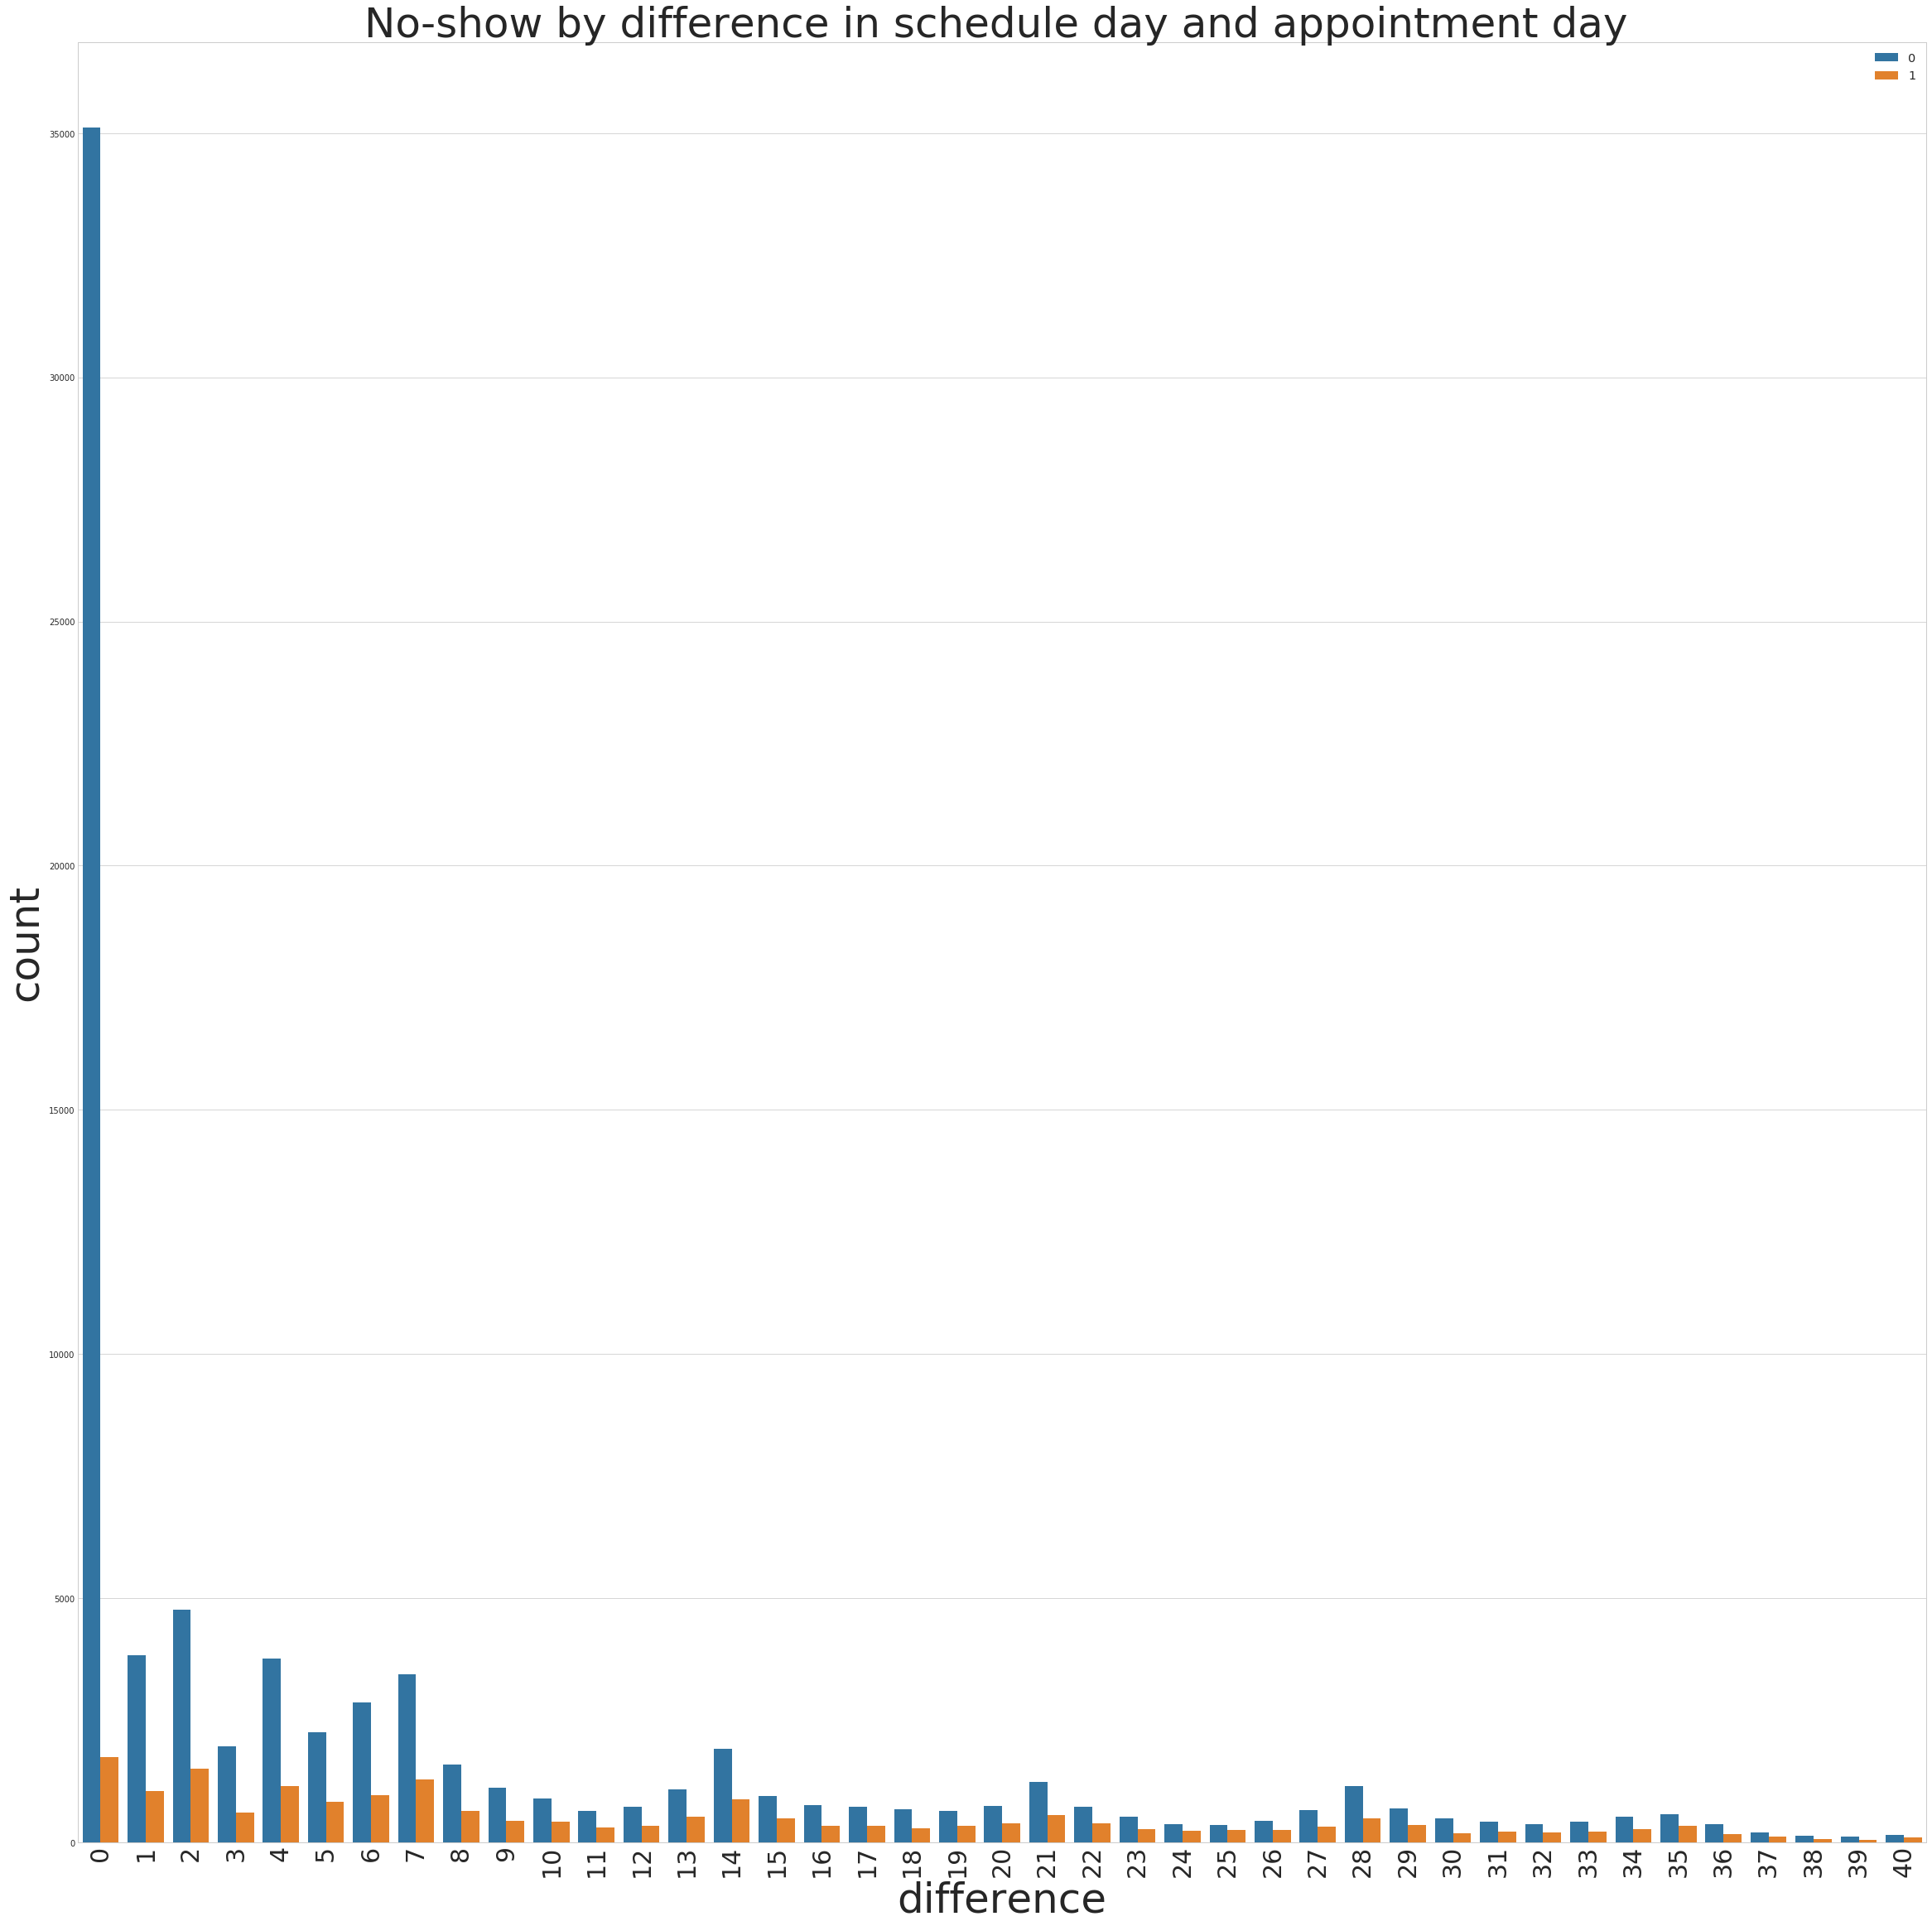

In [149]:
plt.figure(figsize=(40,40))
sns.countplot(x='difference',data=No_show_diff,hue='no_show_catergorical').set_title('No-show by difference in schedule day and appointment day ',fontsize=50);
plt.xlabel('difference', fontsize=50)
plt.ylabel('count', fontsize=50)
plt.xticks(fontsize=30, rotation=90);
plt.legend(loc=1, fontsize = 'x-large')

# Conclusion For the Dataset

Thus We see that <br>

-  We have more female vs male in the dataset <br>

-  We have more Show vs no-show in the data set <br>

-  hildren and Youth are the age group that miss their appointments <br> 

-  We see that people with scholarship have higher chance of missing an appointment as compared to peopl having no scholarship <br>

-  People with no handicap are at a greater chance of being a no show as oppsed to people with handicap <br>

-  Suffering from alcholism has no affect on being show or now show  <br>

-  People without hypertension are more likely to be no shows  followed by diabetes<br>

-   Wednesdays followed by Mondays have more no shows <br>

-  JARDIM CAMBURI is the neighbourhood with most no show <br>

-  People  who received no SMS are more likely to show up <br>

-  Most appointments are scheduled between 0-40 days <br> 
-  As the duration between schedule and appointment increases we also see that no-show to increases <br>


# Limitations 


-  Please note that the above conclusion are based on the assumption made and stated above in the notebook also this analysis do not use any inferential statistics and just based on visual inspection of data <br>

-  There are more No shows vs Shows so as such the data is skrewed 

-  There are more females vs male in the dataset 

-  Many neighbourhoods are mixed in this dataset . I feel this data set should be split by its corresponding neighbourhood so to analyse the reason for no show for each clinic . This way we would be able to customize the findings 

-  Mostly made up of Catergorical data hence findings are bit limited to bar and histographs mostly 

-  Most feature had skewed numbes such as more female vs male , more no scholarship vs scholarship 


# Fitting a deep learning model  using Keras  

# This is my first attempt at fitting a Deep learning model for this analysis I am not using hyperparameter tuning 

In [96]:
No_show.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day,difference
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0,Senior,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0,Senior,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0,Senior,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0,Children,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0,Senior,Friday,0


In [97]:
# Now for fitting a deep learning model we I am going convert columns  gender to dummy variable and drop columns scheduledday
#appointmentday #neighbourhood  . Remaining columns are already converted to dummy columns 

In [98]:
#Assigning the data set to a new dataframe 

In [99]:
#making a copy of the cleaned and analysed dataset
Noshow_logistic= No_show.copy()

In [100]:
Noshow_logistic.head()


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,handicap_modified,no_show_catergorical,age-groups,appointment_week_day,difference
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No,0,0,Senior,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No,0,0,Senior,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No,0,0,Senior,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,0,Children,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No,0,0,Senior,Friday,0


In [101]:
#Dropping unecessary columns 
Noshow_logistic.drop(labels=['scheduledday','appointmentday','neighbourhood','age-groups','no_show'],axis=1,inplace =True)

In [102]:
Noshow_logistic.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap_modified,no_show_catergorical,appointment_week_day,difference
0,F,62,0,1,0,0,0,0,0,Friday,0
1,M,56,0,0,0,0,0,0,0,Friday,0
2,F,62,0,0,0,0,0,0,0,Friday,0
3,F,8,0,0,0,0,0,0,0,Friday,0
4,F,56,0,1,1,0,0,0,0,Friday,0


In [103]:
#Converting gender to dummy variable 
sex=pd.get_dummies(No_show['gender'],drop_first=True)

In [104]:
Noshow_logistic= pd.concat([Noshow_logistic,sex],axis=1)

In [105]:
day_of_week=pd.get_dummies(No_show['appointment_week_day'],drop_first=True)


In [106]:
#Dropping gender columns as we have converted string to dummy variable 
Noshow_logistic.drop(labels=['gender','appointment_week_day'],axis=1,inplace=True)

In [107]:
Noshow_logistic= pd.concat([Noshow_logistic,day_of_week],axis=1)

In [108]:
#Seperating the dependent and independent vairiables to be fed into the model 
X=Noshow_logistic.drop('no_show_catergorical',axis=1)
y=Noshow_logistic['no_show_catergorical']

In [109]:
mean=X['age'].mean()
std=X['age'].std()

In [110]:
X['age-scaled'] = (X['age']-mean)/std

In [111]:
X.drop(labels='age',axis=1,inplace=True)

In [112]:
X.head()

,scholarship,hypertension,diabetes,alcoholism,sms_received,handicap_modified,difference,M,Monday,Saturday,Thursday,Tuesday,Wednesday,age-scaled
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.279339
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.997196
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.279339
3,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.259953
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0.997196


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# Splitting the dataset into train test portions 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [115]:
import keras 

Using TensorFlow backend.


In [116]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras import backend as K
K.clear_session()

In [117]:
classifier=Sequential()

In [118]:
# Using 10 nodes in second layer and 14 parametes as inputs 
classifier.add(Dense(units=10,input_dim=14,activation='relu'))

In [119]:
#Using 10 node in second layer 
classifier.add(Dense(units=10,activation='relu'))

In [120]:
#Using 10 node in third layer 
classifier.add(Dense(units=8,activation='relu'))

In [121]:
#Using 1 node in output layer as we need to predict Yes or no
classifier.add(Dense(units=1,activation='sigmoid'))


In [122]:
#Defining the los fuction to optimize  and the alogrithem by which optimization will be performed 
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [123]:
#Feeding data into the model 
classifier.fit(X_train.values,y_train.values,batch_size=32,epochs=500)

In [124]:

y_pred=classifier.predict(X_test.values)
y_pred=(y_pred>0.5)

In [125]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [126]:
cm

array([[8865, 7821],
       [3544,  796]])

In [127]:
(cm[0,0]+cm[1,1])/cm.sum()

0.45947874060686766

## Thus this deep learning model predicts no shows with 79% accuracy given the above input parameters 

## We can further improve the performance of this model by adding more feature which we ommited like appointment days  and neighourhood and also tuning the architecture of the ANN 

In [156]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0